# Queensland Department of Education, Training, and Employment Exit Survey

## By Steven Dorsher

This is a **DataQuest Guided Project** for the unit on data cleaning.

Question 1: Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

Question 2: Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

The (Queensland Department of Education, Training, and Employment)[https://en.wikipedia.org/wiki/Department_of_Education_(Queensland)] is responsible for primary and secondary education in Queensland. The (DETE exit survey)[https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey] was given to teachers and other employees who left the department. This was based upon an original TAFE survey of a similar form, also given in similar circumstances. I will be examining data from both.

In [1]:
import pandas as pd

In [2]:
dete_survey=pd.read_csv('dete_survey.csv')
tafe_survey=pd.read_csv('tafe_survey.csv')

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

One integrer ID, 18 bool columns, 37 columns that are objects (probably strings). It looks like there are 822 rows. Business Unit, and the last four questions on diversity, have a lot of NaN's. Some other columns have as much as 75ish NaNs, and may need to be addressed.

In [4]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

702 rows, 72 columns. Record ID is a float rather than an integer in this table. There are no boolean columns. Several columns have as much as 1/3 NaN's. ContributingFactors all have exactly 437 non-null values. MainFactor has 113. Other columns have fewer NaN's but still as much as 150ish NaN values.

In [5]:
dete_survey.head(5)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [6]:
tafe_survey.head(5)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [7]:
dete_survey['Business Unit'].value_counts()

Education Queensland                          54
Information and Technologies                  26
Training and Tertiary Education Queensland    12
Other                                         11
Human Resources                                6
Corporate Strategy and Peformance              5
Early Childhood Education and Care             3
Infrastructure                                 2
Policy, Research, Legislation                  2
Indigenous Education and Training Futures      1
Corporate Procurement                          1
Pacific Pines SHS                              1
Finance                                        1
Calliope State School                          1
Name: Business Unit, dtype: int64

In [8]:
tafe_survey['Institute'].value_counts()

Brisbane North Institute of TAFE         161
Southern Queensland Institute of TAFE    142
Central Queensland Institute of TAFE     108
Sunshine Coast Institute of TAFE          91
Tropical North Institute of TAFE          70
SkillsTech Australia                      57
Southbank Institute of Technology         43
Barrier Reef Institute of TAFE            14
Mount Isa Institute of TAFE               12
Wide Bay Institute of TAFE                 2
The Bremer Institute of TAFE               1
Metropolitan South Institute of TAFE       1
Name: Institute, dtype: int64

In [9]:
tafe_survey['WorkArea'].value_counts()

Non-Delivery (corporate)    432
Delivery (teaching)         270
Name: WorkArea, dtype: int64

In [10]:
dete_survey['Position'].value_counts()

Teacher                                                    324
Teacher Aide                                               137
Public Servant                                             126
Cleaner                                                     97
Head of Curriculum/Head of Special Education                38
Schools Officer                                             24
School Administrative Staff                                 16
Guidance Officer                                            12
Technical Officer                                           11
Professional Officer                                         7
Other                                                        7
School Principal                                             5
School Based Professional Staff (Therapist, nurse, etc)      5
Business Service Manager                                     4
Deputy Principal                                             4
Name: Position, dtype: int64

In [11]:
tafe_survey['Classification. Classification'].value_counts()

Administration (AO)           293
Teacher (including LVT)       201
Professional Officer (PO)      33
Operational (OO)               24
Tutor                          16
Workplace Training Officer     11
Technical Officer (TO)         10
Executive (SES/SO)              6
Apprentice                      2
Name: Classification. Classification, dtype: int64

In [12]:
dete_survey['Region'].value_counts()

Metropolitan                135
Central Office              130
South East                  108
Not Stated                  105
Darling Downs South West     95
Central Queensland           84
North Coast                  75
North Queensland             53
Far North Queensland         37
Name: Region, dtype: int64

dete index | tafe index | dete column name | tafe column name
--- | --- | --- | ---
0 | 0 | ID | Record ID
1 | 4 | Separation Type | Reason for ceasing employment
2 | 3 | Cease Date | CEASSATION YEAR
3 | none A | DETE Start Date | none A
4 | none B | Role Start Date | none B
none A | 70 | none A | LengthofServiceOverall. Overall Length of Service at Institute (in years)
none B | 71 | none B | LengthofServiceCurrent. Length of Service at current workplace (in years)             
5 | 69 | Position | Classification. Classification 
7 | 1 | Region | Institute 
9 | 68 | Employment Status | Employment Type. Employment Type
10 | 5 | Career move to public sector | Contributing Factors. Career Move - Public Sector
11 | 6 | Career move to private sector | Contributing Factors. Career Move - Private Sector
12 | 12 | Interpersonal Conflicts | Contributing Factors. Interpersonal Conflict
13 | 11 | Job Disatisfaction | Contributing Factors. Job Dissatisfaction
20 | 9 | Maternity/Family | Contributing Factors. Maternity/Family
23 | 8 | Ill Health | Contributing Factors. Ill Health
22 | 13,14 | Study/Travel | Contributing Factors. Study, Contributing Factors. Travel
49 | 66 | Gender | Gender. What is your Gender?
50 | 67 | Age | CurrentAge. Current Age


I didn't include any information about opinion question columns

Opinion Question Columns

dete index | tafe index | dete column name | abbreviated tate name | inverted?
--- | --- | --- | --- | ---
none | 17 | none |  Main Factor | none
none | 18 | none | Topic:1, Senior Leadership Vision | none
38 | 19 | Skills | Topic:2, skills training | none
28 | 20 | Professional Development | Topic:3, personal development | no?
29 | 21 | Opportunities for Promotion | Topic:4, promotion | no
none | 22 | none | Topic:5, salary | none
16 | 23,43 | Lack of Recognition | Topic:6, recognition | yes
35 | 24,25 | Performance of Supervisor | Topic:7,8, managment supportive | ???
46 | 26 | Kept Informed | Topic:9, kept informed | no
30 | 27,47 | Staff morale | Topic:10, staff morale | no
31 | 28-30 | Workplace issue | Topic:11-13, | workplace issue dealt with well | ???
35 | 31 | Performance of Supervisor | Topic:14, satisfied with management | ???
37 | 34 | Initiative | Topic:17, use initiative | no
36 | 36 | Peer Support | Topic:19, peer support | no
33 | 42 | Worklife Balance | Topic:25, worklife balance | no
15 | 44 | Physical work environment | Topic:27 | ???
39 | 45 | Coach | Topic:28, opportunity to mentor or coach | no



Career Aspirations, Traumatic Incident, and Relocation in DETE don't have direct parallels among the questions in TAFE, but rather are complex combinations of questions perhaps, or not even present. Salary is not present in DETE, nor can we (clearly) know the main factor.

## Setting the scope of the analysis

In [13]:
dete_survey=pd.read_csv('dete_survey.csv',na_values='Not Stated')

In [14]:
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49],axis=1)

In [15]:
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

In [16]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [17]:
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

As directed by the guided project, I have opted not to perform a more thorough analysis of the opinion based survey questions. Honestly, given that this is only an end of unit project, this seems reasonable to the scope of the analysis.

## Cleaning column names

In [18]:
dete_survey_updated.columns=dete_survey_updated.columns.str.strip().str.replace('\s+','_').str.lower()

In [19]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [20]:
col_dict={'Record ID':'id','CESSATION YEAR':'cease_date','Reason for ceasing employment':'separationtype',\
          'Gender. What is your Gender?':'gender','CurrentAge. Current Age':'age',\
         'Employment Type. Employment Type':'employment_status',\
         'Classification. Classification':'position',\
         'LengthofServiceOverall. Overall Length of Service at Institute (in years)':\
         'institute_service',\
         'LengthofServiceCurrent. Length of Service at current workplace (in years)':\
         'role_service'}

In [21]:
tafe_survey_updated=tafe_survey_updated.rename(columns=col_dict)

In [22]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [23]:
tafe_survey_updated['gender'].value_counts()

Female    389
Male      207
Name: gender, dtype: int64

In [24]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [25]:
col_dict2={'Contributing Factors. Career Move - Public Sector ':'career_move_to_public_sector',
       'Contributing Factors. Career Move - Private Sector ':'career_move_to_private_sector',
       'Contributing Factors. Career Move - Self-employment':'self_employment',
       'Contributing Factors. Ill Health':'ill_health',
       'Contributing Factors. Maternity/Family':'maternity/family',
       'Contributing Factors. Dissatisfaction':'dissatisfaction',
       'Contributing Factors. Job Dissatisfaction':'job_dissatisfaction',
       'Contributing Factors. Interpersonal Conflict':'interpersonal_conflicts',
       'Contributing Factors. Study':'study', 'Contributing Factors. Travel':'travel',
       'Contributing Factors. Other':'other_contributing_factors', 'Contributing Factors. NONE':'no_contributing_factors'}

In [26]:
tafe_survey_updated=tafe_survey_updated.rename(columns=col_dict2)

In [27]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'career_move_to_public_sector', 'career_move_to_private_sector',
       'self_employment', 'ill_health', 'maternity/family', 'dissatisfaction',
       'job_dissatisfaction', 'interpersonal_conflicts', 'study', 'travel',
       'other_contributing_factors', 'no_contributing_factors', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [28]:
tafe_survey_updated=tafe_survey_updated.rename(columns={'Institute':'institute','WorkArea':'work_area'})

In [29]:
tafe_survey_updated.columns

Index(['id', 'institute', 'work_area', 'cease_date', 'separationtype',
       'career_move_to_public_sector', 'career_move_to_private_sector',
       'self_employment', 'ill_health', 'maternity/family', 'dissatisfaction',
       'job_dissatisfaction', 'interpersonal_conflicts', 'study', 'travel',
       'other_contributing_factors', 'no_contributing_factors', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

I renamed the DETE survey columns to lowercase with underscores between. I renamed the columns in the updated TAFE survey to correspond to the lowercase columns in the updated DETE survey except those columns that had no clear correspondence, where I simply renamed them to lowercase column names with underscores between, truncating category information. The exceptions were "other" and "none", where I changed them to "other contributing factors" and "no contributing factors" (with underscores) for clairity. 

# Selecting those who resigned

In [30]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [31]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [32]:
dete_resignation_reasons=['Resignation-Other reasons','Resignation-Other employer','Resignation-Move overseas/interstate']

In [33]:
dete_is_resignation=dete_survey_updated['separationtype'].apply(lambda x: x in dete_resignation_reasons)

In [34]:
dete_resignations=dete_survey_updated[dete_is_resignation].copy()

In [35]:
dete_resignations.head(5)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [36]:
tafe_resignations=tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation']

In [37]:
tafe_resignations.head(5)

,id,institute,work_area,cease_date,separationtype,career_move_to_public_sector,career_move_to_private_sector,self_employment,ill_health,maternity/family,...,study,travel,other_contributing_factors,no_contributing_factors,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


I selected only the data that corresponded to resignations in both tables. In the DETE table there were three values, 'Resignation-Other reasons','Resignation-Other employer', and 'Resignation-Move overseas/interstate'. In the TAFE survey there was only 'Resignation'.

In [38]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
07/2006      1
09/2010      1
Name: cease_date, dtype: int64

In [39]:
dete_resignations['cease_date']=dete_resignations['cease_date'].str.extract(r"(20[012][0-9])").astype(float)

In [40]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [41]:
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [42]:
dete_total_years=dete_resignations['cease_date']-dete_resignations['dete_start_date']

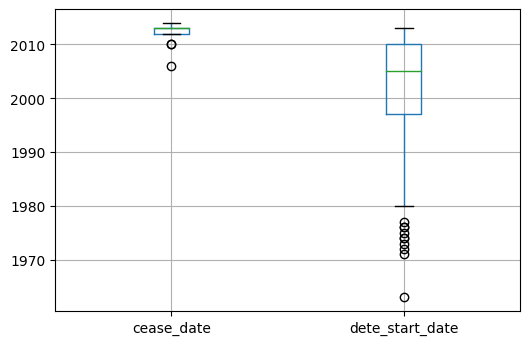

In [43]:
%matplotlib inline

from matplotlib import pyplot as plt
dete_resignations.boxplot(column=['cease_date','dete_start_date'])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb20877d760>]],
      dtype=object)

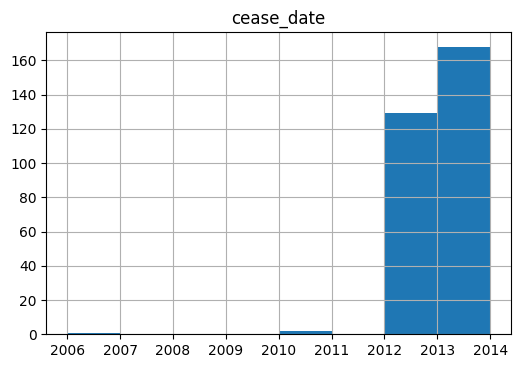

In [44]:
dete_resignations.hist('cease_date',bins=8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2071dc5e0>]],
      dtype=object)

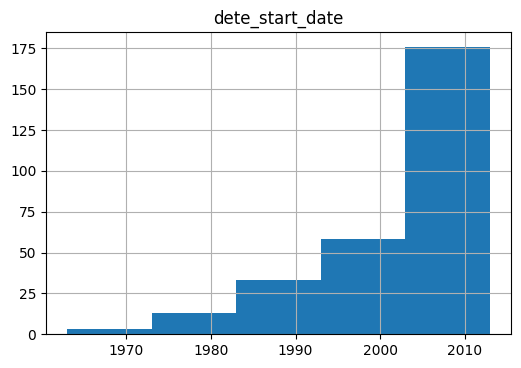

In [45]:
dete_resignations.hist('dete_start_date',bins=5)

It is my opinion that all except the lowest outlier are legitimate data points for the start date and that it is a highly skew-right distribution. It is my opinion that the end dates before 2011 should be rejected because it is possible there was no actual data collection at that time based on the frequency of the data distribution. The reason I would reject the 1963 start date is that it is nearly a decade before the next one and I think it is unlikely a single employee worked alone for a decade in the 1960's then resigned in the 2010's-- though it is possible. Another possible interpretation of that datapoint is that only one employee from the 1960's was still employeed in the 2010's and then decided to resign.

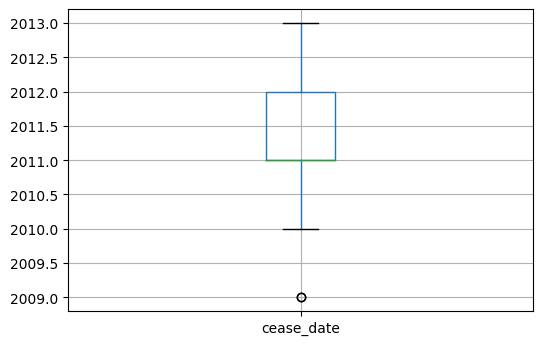

In [46]:
tafe_resignations.boxplot(column='cease_date')
plt.show()

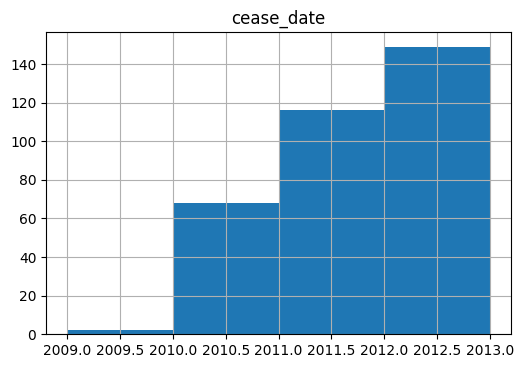

In [47]:
tafe_resignations.hist('cease_date',bins=4)
plt.show()

For TAFE resignations it looks like maybe data wasn't collected in 2009 so 2009 should be rejected. The number of resignations in later years is a factor of 50 higher. 

In [48]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

I am going to select only cease dates of 2012 and 2013 since these are well represented in both data sets.

In [49]:
def date_cut(x):
    return (x>=2012) & (x<2014)
    

In [50]:
dete_resignations_cut = dete_resignations['cease_date'].apply(date_cut)

In [51]:
tafe_resignations_cut=tafe_resignations['cease_date'].apply(date_cut)

In [52]:
dete_select_cease_years=dete_resignations[dete_resignations_cut].copy()

In [53]:
tafe_select_cease_years = tafe_resignations[tafe_resignations_cut].copy()

In [54]:
tafe_select_cease_years['institute_service'].value_counts()

1-2                   37
3-4                   27
Less than 1 year      26
5-6                   18
7-10                  13
11-20                 10
More than 20 years     1
Name: institute_service, dtype: int64

In [55]:
dete_select_cease_years['institute_service']=dete_select_cease_years['cease_date']-dete_select_cease_years['dete_start_date']

In [56]:
dete_select_cease_years['institute_service'].value_counts().sort_index()

0.0     19
1.0     22
2.0     11
3.0     19
4.0     14
5.0     22
6.0     14
7.0     12
8.0      8
9.0     13
10.0     4
11.0     3
12.0     5
13.0     8
14.0     6
15.0     6
16.0     4
17.0     6
18.0     5
19.0     3
20.0     6
21.0     3
22.0     5
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
30.0     2
32.0     3
33.0     1
35.0     1
36.0     2
38.0     1
39.0     2
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

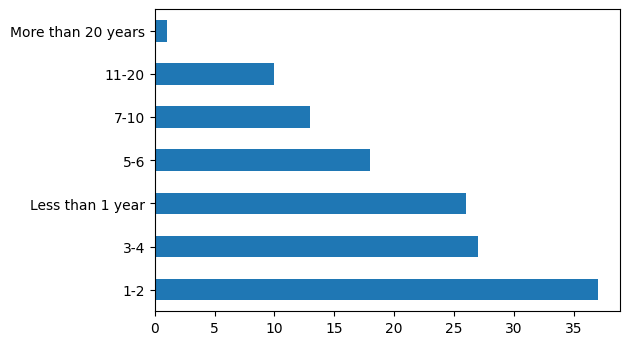

In [57]:
tafe_select_cease_years['institute_service'].value_counts().plot(kind='barh')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb20762d580>]],
      dtype=object)

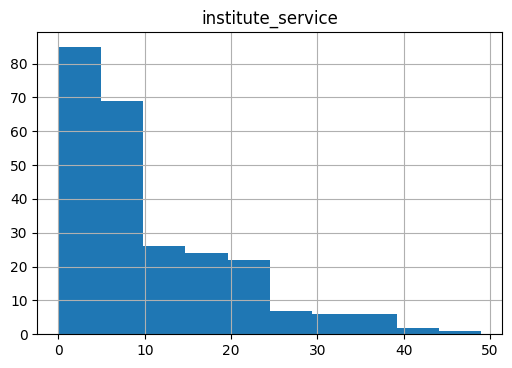

In [58]:
dete_select_cease_years.hist('institute_service',bins=10)

In [59]:
tafe_select_cease_years['cease_date'].value_counts()

2012.0    94
2013.0    55
Name: cease_date, dtype: int64

In [60]:
dete_select_cease_years['cease_date'].value_counts()

2013.0    146
2012.0    129
Name: cease_date, dtype: int64

I selected only the data with the cease dates in the years 2012 and 2013 from the DETE and TAFE surveys to make the data consistent. These were the years with the greatest number of cease dates in the DETE survey, where the data was most reliable, and were among the years in the TAFE survey with large quantities of data. I then created a column in the DETE dataframe with the selected years that contained the difference between the end and start dates in the DETE system and called it institute service to match the dataframe with the selected cease years for TAFE. Note that the TAFE datframe has categories for cease years rather than specific times, so it will be necessary to categorize the DETE data. I preliminarily histogrammed this data and in a general sense, the distribution of the DETE data is consistent with the TAFE data.

In [61]:
def categorize_institute_service(years):
    year_string=''
    if years<1.0:
        year_string='Less than 1 year'
    elif years< 3.0:
        year_string = '1-2'
    elif years<5.0:
        year_string='3-4'
    elif years<6.0:
        year_string='5-6'
    elif years<11.0:
        year_string='7-10'
    elif years<21.0:
        year_string='11-20'
    else:
        year_string='More than 20 years'
    return year_string

In [62]:
dete_year_categories=dete_select_cease_years['institute_service'].apply(categorize_institute_service)

In [63]:
dete_year_categories.value_counts()

More than 20 years    65
11-20                 52
7-10                  51
1-2                   33
3-4                   33
5-6                   22
Less than 1 year      19
Name: institute_service, dtype: int64

In [64]:
dete_select_cease_years['institute_service_category']=dete_year_categories

In [65]:
dete_select_cease_years['institute_service_category'].head(5)

3      7-10
5     11-20
8       3-4
9     11-20
11      3-4
Name: institute_service_category, dtype: object

In [66]:
dete_service=dete_select_cease_years['institute_service_category'].value_counts()

In [67]:
dete_service

More than 20 years    65
11-20                 52
7-10                  51
1-2                   33
3-4                   33
5-6                   22
Less than 1 year      19
Name: institute_service_category, dtype: int64

In [68]:
tafe_service=tafe_select_cease_years['institute_service'].value_counts()

In [69]:
tafe_service

1-2                   37
3-4                   27
Less than 1 year      26
5-6                   18
7-10                  13
11-20                 10
More than 20 years     1
Name: institute_service, dtype: int64

In [70]:
service_category_sort_map={'Less than 1 year':0, '1-2':1,'3-4':2,'5-6':3,'7-10':4,'11-20':5,'More than 20 years':6}

In [71]:
dete_service.index.name='years_served'

In [72]:
tafe_service.index.name='years_served'

In [73]:
df_dete_service=pd.DataFrame()

In [74]:
df_dete_service['count']=dete_service

In [75]:
df_dete_service

,count
years_served,
More than 20 years,65
11-20,52
7-10,51
1-2,33
3-4,33
5-6,22
Less than 1 year,19


In [76]:
df_tafe_service=pd.DataFrame()

In [77]:
df_tafe_service['count']=tafe_service

In [78]:
df_dete_service=df_dete_service.reset_index()

In [79]:
df_tafe_service=df_tafe_service.reset_index()

In [80]:
df_tafe_service['years_served']

0                   1-2
1                   3-4
2      Less than 1 year
3                   5-6
4                  7-10
5                 11-20
6    More than 20 years
Name: years_served, dtype: object

In [81]:
df_tafe_service['order']=df_tafe_service['years_served'].map(service_category_sort_map)

In [82]:
df_tafe_service=df_tafe_service.sort_values('order',ascending=False)

In [83]:
df_tafe_service

,years_served,count,order
6,More than 20 years,1,6
5,11-20,10,5
4,7-10,13,4
3,5-6,18,3
1,3-4,27,2
0,1-2,37,1
2,Less than 1 year,26,0


In [84]:
df_dete_service['order']=df_dete_service['years_served'].map(service_category_sort_map)

In [85]:
df_dete_service=df_dete_service.sort_values('order',ascending=False)

In [86]:
df_dete_service

,years_served,count,order
0,More than 20 years,65,6
1,11-20,52,5
2,7-10,51,4
5,5-6,22,3
4,3-4,33,2
3,1-2,33,1
6,Less than 1 year,19,0


In [87]:
both_service=pd.DataFrame()

In [88]:
both_service['years_served']=df_dete_service['years_served']

In [89]:
both_service['dete_count']=df_dete_service['count']

In [90]:
both_service['tafe_count']=df_tafe_service['count']

In [91]:
both_service

,years_served,dete_count,tafe_count
0,More than 20 years,65,37
1,11-20,52,27
2,7-10,51,26
5,5-6,22,10
4,3-4,33,13
3,1-2,33,18
6,Less than 1 year,19,1


# DETE vs TAFE: sensible data cuts, sensible data

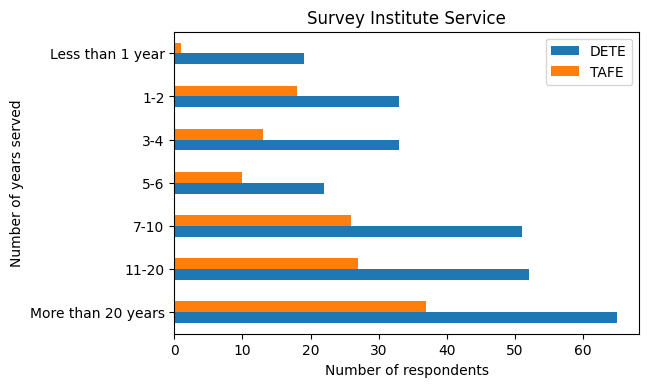

In [92]:
both_service.plot.barh(x='years_served')
plt.title('Survey Institute Service')
plt.xlabel('Number of respondents')
plt.ylabel('Number of years served')
plt.legend(['DETE','TAFE'])
plt.show()

TAFE and DETE surveys have similar distributions suggesting that their populations were basically similar. The main distinction is in the less than one year of service population. Does this have to do with the cuts I made to the survey? Or does this have to do with some factor related to how the survey was given? Or to the inherrent population?

**Less than 1 year**

I am divided about what to do with the less than one year data

- If this were an analysis about the difference between the two data sets, the less than one year data would be absolutely essential because of the difference it reveals.
- However, this is an analysis that combines the two data sets to analyze other factors. The less than one year data may indicate some sampling bias, especially considering the low numbers in the TAFE data set, and it is possible I would get better results in an analysis of factors contributing to dissatisfaction if I reject these values. 

**I have decided to reject the values for the less than one year data**

In [93]:
dete_gt_one_year=dete_select_cease_years[dete_select_cease_years['institute_service_category']!='Less than 1 year'].copy()

In [94]:
dete_gt_one_year['institute_service_category'].value_counts()

More than 20 years    65
11-20                 52
7-10                  51
1-2                   33
3-4                   33
5-6                   22
Name: institute_service_category, dtype: int64

In [95]:
tafe_gt_one_year=tafe_select_cease_years[tafe_select_cease_years['institute_service']!='Less than 1 year'].copy()

In [96]:
tafe_gt_one_year['institute_service'].value_counts()

1-2                   37
3-4                   27
5-6                   18
7-10                  13
11-20                 10
More than 20 years     1
Name: institute_service, dtype: int64

# Idenitify contributing factors: Was there dissatisfaction?

In [97]:
tafe_gt_one_year['dissatisfaction'].value_counts()

-                                         102
Contributing Factors. Dissatisfaction      19
Name: dissatisfaction, dtype: int64

In [98]:
tafe_gt_one_year['job_dissatisfaction'].value_counts()

-                      100
Job Dissatisfaction     21
Name: job_dissatisfaction, dtype: int64

In [99]:
import numpy as np
def update_vals(val):
    mask = pd.array([True, False, pd.NA], dtype="boolean")
    new_val=True
    if pd.isnull(val):
        new_val=mask[2]
    elif val=='-':
        new_val=mask[0]
    else:
        new_val=mask[1]
    return new_val

In [100]:
d_col=['dissatisfaction','job_dissatisfaction']

In [101]:
tafe_dissatisfaction_map=tafe_gt_one_year.copy()

In [102]:
tafe_dissatisfaction_map[d_col]=tafe_gt_one_year[d_col].applymap(update_vals)

In [103]:
tafe_dissatisfaction_map.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 274 to 701
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             123 non-null    float64
 1   institute                      123 non-null    object 
 2   work_area                      123 non-null    object 
 3   cease_date                     123 non-null    float64
 4   separationtype                 123 non-null    object 
 5   career_move_to_public_sector   121 non-null    object 
 6   career_move_to_private_sector  121 non-null    object 
 7   self_employment                121 non-null    object 
 8   ill_health                     121 non-null    object 
 9   maternity/family               121 non-null    object 
 10  dissatisfaction                121 non-null    object 
 11  job_dissatisfaction            121 non-null    object 
 12  interpersonal_conflicts        121 non-null    o

In [104]:
tafe_dissatisfaction_map['dissatisfaction'].value_counts()

True     102
False     19
Name: dissatisfaction, dtype: int64

In [105]:
tafe_dissatisfaction_map['job_dissatisfaction'].value_counts()

True     100
False     21
Name: job_dissatisfaction, dtype: int64

In [106]:
tafe_gt_one_year.columns

Index(['id', 'institute', 'work_area', 'cease_date', 'separationtype',
       'career_move_to_public_sector', 'career_move_to_private_sector',
       'self_employment', 'ill_health', 'maternity/family', 'dissatisfaction',
       'job_dissatisfaction', 'interpersonal_conflicts', 'study', 'travel',
       'other_contributing_factors', 'no_contributing_factors', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [107]:
tafe_gt_one_year=tafe_dissatisfaction_map

In [108]:
tafe_gt_one_year['dissatisfied']=tafe_gt_one_year[d_col].any(axis=1)

In [109]:
tafe_gt_one_year['dissatisfied'].value_counts()

True     114
False      9
Name: dissatisfied, dtype: int64

In [110]:
dete_gt_one_year.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service',
       'institute_service_category'],
      dtype='object')

In [111]:
d_col_dete=['job_dissatisfaction','dissatisfaction_with_the_department']

In [112]:
dete_gt_one_year['dissatisfied']=dete_gt_one_year[d_col_dete].any(axis=1)

In [113]:
dete_resignations_up=dete_gt_one_year.copy()

In [114]:
tafe_resignations_up=tafe_gt_one_year.copy()

In [115]:
dete_resignations_up.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service',
       'institute_service_category', 'dissatisfied'],
      dtype='object')

In [116]:
dete_resignations_up=dete_resignations_up.rename(columns={'dissatisfaction_with_the_department':'dissatisfaction'})

In [117]:
dete_resignations_up.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'maternity/family', 'relocation',
       'study/travel', 'ill_health', 'traumatic_incident', 'work_life_balance',
       'workload', 'none_of_the_above', 'gender', 'age', 'aboriginal',
       'torres_strait', 'south_sea', 'disability', 'nesb', 'institute_service',
       'institute_service_category', 'dissatisfied'],
      dtype='object')

In [118]:
tafe_resignations_up.columns

Index(['id', 'institute', 'work_area', 'cease_date', 'separationtype',
       'career_move_to_public_sector', 'career_move_to_private_sector',
       'self_employment', 'ill_health', 'maternity/family', 'dissatisfaction',
       'job_dissatisfaction', 'interpersonal_conflicts', 'study', 'travel',
       'other_contributing_factors', 'no_contributing_factors', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service', 'dissatisfied'],
      dtype='object')

I converted the dissatisfaction and job dissatisfaction columns in the TAFE survey and the job dissatisfaction and the dissatisfaction with the department columns in the DETE survey to TRUE/FALSE values, then I assigned a new column, dissatisfied, that was TRUE if either column was true, so that the employee was dissatisfied if they were dissatsified for either reason. 

In [119]:
tafe_resignations_up.head()

,id,institute,work_area,cease_date,separationtype,career_move_to_public_sector,career_move_to_private_sector,self_employment,ill_health,maternity/family,...,travel,other_contributing_factors,no_contributing_factors,gender,age,employment_status,position,institute_service,role_service,dissatisfied
274,6.345579e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2012.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,46 50,Permanent Full-time,Administration (AO),11-20,11-20,True
386,6.346177e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2012.0,Resignation,-,-,-,-,Maternity/Family,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,True
389,6.346201e+17,Sunshine Coast Institute of TAFE,Non-Delivery (corporate),2012.0,Resignation,Career Move - Public Sector,-,-,-,Maternity/Family,...,-,-,-,Female,36 40,Temporary Full-time,Administration (AO),5-6,1-2,True
391,6.346236e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2012.0,Resignation,-,-,-,Ill Health,-,...,-,-,-,Female,56 or older,Permanent Full-time,Administration (AO),11-20,1-2,True
395,6.346348e+17,Brisbane North Institute of TAFE,Delivery (teaching),2012.0,Resignation,-,-,-,-,-,...,-,-,-,Female,31 35,Permanent Full-time,Teacher (including LVT),1-2,1-2,True


In [120]:
dete_resignations_up.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,institute_service_category,dissatisfied
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,7-10,False
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,11-20,False
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,3-4,False
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,11-20,True
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,3-4,False


In [121]:
dete_resignations_up['aboriginal'].value_counts()

Yes    6
Name: aboriginal, dtype: int64

In [122]:
dete_dei_col_map=['aboriginal','torres_strait','south_sea','disability','nesb']

In [123]:
dete_resignations_up[dete_dei_col_map]=dete_resignations_up[dete_dei_col_map].applymap(update_vals)

In [124]:
tafe_resignations_up.head()

,id,institute,work_area,cease_date,separationtype,career_move_to_public_sector,career_move_to_private_sector,self_employment,ill_health,maternity/family,...,travel,other_contributing_factors,no_contributing_factors,gender,age,employment_status,position,institute_service,role_service,dissatisfied
274,6.345579e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2012.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,46 50,Permanent Full-time,Administration (AO),11-20,11-20,True
386,6.346177e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2012.0,Resignation,-,-,-,-,Maternity/Family,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,True
389,6.346201e+17,Sunshine Coast Institute of TAFE,Non-Delivery (corporate),2012.0,Resignation,Career Move - Public Sector,-,-,-,Maternity/Family,...,-,-,-,Female,36 40,Temporary Full-time,Administration (AO),5-6,1-2,True
391,6.346236e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2012.0,Resignation,-,-,-,Ill Health,-,...,-,-,-,Female,56 or older,Permanent Full-time,Administration (AO),11-20,1-2,True
395,6.346348e+17,Brisbane North Institute of TAFE,Delivery (teaching),2012.0,Resignation,-,-,-,-,-,...,-,-,-,Female,31 35,Permanent Full-time,Teacher (including LVT),1-2,1-2,True


In [125]:
tafe_other_col_map=['career_move_to_public_sector','career_move_to_private_sector','self_employment','ill_health','maternity/family','interpersonal_conflicts','study','travel','other_contributing_factors', 'no_contributing_factors']

In [126]:
tafe_resignations_up['career_move_to_public_sector'].value_counts()

-                              106
Career Move - Public Sector     15
Name: career_move_to_public_sector, dtype: int64

In [127]:
tafe_resignations_up[tafe_other_col_map]=tafe_resignations_up[tafe_other_col_map].applymap(update_vals)

In [128]:
tafe_resignations_up['career_move_to_public_sector'].value_counts(dropna=True)

True     106
False     15
Name: career_move_to_public_sector, dtype: int64

In [129]:
tafe_resignations_up['dissatisfaction'].value_counts()

True     102
False     19
Name: dissatisfaction, dtype: int64

In [130]:
tafe_resignations_up[tafe_other_col_map].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 274 to 701
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   career_move_to_public_sector   121 non-null    object
 1   career_move_to_private_sector  121 non-null    object
 2   self_employment                121 non-null    object
 3   ill_health                     121 non-null    object
 4   maternity/family               121 non-null    object
 5   interpersonal_conflicts        121 non-null    object
 6   study                          121 non-null    object
 7   travel                         121 non-null    object
 8   other_contributing_factors     121 non-null    object
 9   no_contributing_factors        121 non-null    object
dtypes: object(10)
memory usage: 10.6+ KB


In [131]:
dete_factor_col_map=['physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'maternity/family', 'relocation',
       'study/travel', 'ill_health', 'traumatic_incident', 'work_life_balance',
       'workload', 'none_of_the_above']

In [132]:
dete_resignations_up[dete_factor_col_map]=dete_resignations_up[dete_factor_col_map].applymap(update_vals)

In [133]:
tafe_resignations_up['study/travel']=tafe_resignations[['study','travel']].any(axis=1)

In [134]:
tafe_resignations_up['institute_service_category']=tafe_resignations_up['institute_service']

In [135]:
tafe_resignations_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 274 to 701
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             123 non-null    float64
 1   institute                      123 non-null    object 
 2   work_area                      123 non-null    object 
 3   cease_date                     123 non-null    float64
 4   separationtype                 123 non-null    object 
 5   career_move_to_public_sector   121 non-null    object 
 6   career_move_to_private_sector  121 non-null    object 
 7   self_employment                121 non-null    object 
 8   ill_health                     121 non-null    object 
 9   maternity/family               121 non-null    object 
 10  dissatisfaction                121 non-null    object 
 11  job_dissatisfaction            121 non-null    object 
 12  interpersonal_conflicts        121 non-null    o

In [136]:
tafe_resignations_up['dissatisfied'].value_counts()

True     114
False      9
Name: dissatisfied, dtype: int64

In [137]:
dete_resignations_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 3 to 821
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             256 non-null    int64  
 1   separationtype                 256 non-null    object 
 2   cease_date                     256 non-null    float64
 3   dete_start_date                229 non-null    float64
 4   role_start_date                220 non-null    float64
 5   position                       253 non-null    object 
 6   classification                 129 non-null    object 
 7   region                         213 non-null    object 
 8   business_unit                  24 non-null     object 
 9   employment_status              252 non-null    object 
 10  career_move_to_public_sector   256 non-null    bool   
 11  career_move_to_private_sector  256 non-null    bool   
 12  interpersonal_conflicts        256 non-null    boo

In [138]:
tafe_resignations_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 274 to 701
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             123 non-null    float64
 1   institute                      123 non-null    object 
 2   work_area                      123 non-null    object 
 3   cease_date                     123 non-null    float64
 4   separationtype                 123 non-null    object 
 5   career_move_to_public_sector   121 non-null    object 
 6   career_move_to_private_sector  121 non-null    object 
 7   self_employment                121 non-null    object 
 8   ill_health                     121 non-null    object 
 9   maternity/family               121 non-null    object 
 10  dissatisfaction                121 non-null    object 
 11  job_dissatisfaction            121 non-null    object 
 12  interpersonal_conflicts        121 non-null    o

I also cleaned the other columns of factors and DEI information to be true/false, when possible. I combined the travel and study columns in the tafe data frame using or logic to produce a travel/study column like the dete survey used. I matched column names when possible.

# COMBINING DATA FRAMES

In [139]:
tafe_resignations_up['survey_institute']='TAFE'

In [140]:
dete_resignations_up['survey_institute']='DETE'

In [141]:
combined=pd.concat([dete_resignations_up,tafe_resignations_up])

In [142]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 3 to 701
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             379 non-null    float64
 1   separationtype                 379 non-null    object 
 2   cease_date                     379 non-null    float64
 3   dete_start_date                229 non-null    float64
 4   role_start_date                220 non-null    float64
 5   position                       359 non-null    object 
 6   classification                 129 non-null    object 
 7   region                         213 non-null    object 
 8   business_unit                  24 non-null     object 
 9   employment_status              358 non-null    object 
 10  career_move_to_public_sector   377 non-null    object 
 11  career_move_to_private_sector  377 non-null    object 
 12  interpersonal_conflicts        377 non-null    obj

In [143]:
combined_updated=combined.dropna(thresh=219, axis=1).copy()

In [144]:
combined_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'employment_status',
       'career_move_to_public_sector', 'career_move_to_private_sector',
       'interpersonal_conflicts', 'job_dissatisfaction', 'dissatisfaction',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'institute_service',
       'institute_service_category', 'dissatisfied', 'survey_institute'],
      dtype='object')

In [145]:
combined.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'maternity/family', 'relocation',
       'study/travel', 'ill_health', 'traumatic_incident', 'work_life_balance',
       'workload', 'none_of_the_above', 'gender', 'age', 'aboriginal',
       'torres_strait', 'south_sea', 'disability', 'nesb', 'institute_service',
       'institute_service_category', 'dissatisfied', 'survey_institute',
       'institute', 'work_area', 'self_employment', 'study', 'travel',
       'other_contributing_factors', 'no_contributing_factors',
       'role_service'],
      dtype='object')

In [146]:
combined.columns.to_list()==combined_updated.columns.to_list()

False

In [147]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 3 to 701
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             379 non-null    float64
 1   separationtype                 379 non-null    object 
 2   cease_date                     379 non-null    float64
 3   dete_start_date                229 non-null    float64
 4   role_start_date                220 non-null    float64
 5   position                       359 non-null    object 
 6   employment_status              358 non-null    object 
 7   career_move_to_public_sector   377 non-null    object 
 8   career_move_to_private_sector  377 non-null    object 
 9   interpersonal_conflicts        377 non-null    object 
 10  job_dissatisfaction            377 non-null    object 
 11  dissatisfaction                377 non-null    object 
 12  physical_work_environment      256 non-null    obj

In [148]:
combined_updated.describe(include=[np.bool])

,study/travel,dissatisfied
count,379,379
unique,2,2
top,False,False
freq,258,214


In [149]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    214
True     165
Name: dissatisfied, dtype: int64

In [150]:
combined_updated['dissatisfied_number']=combined_updated['dissatisfied'].apply(lambda x: 1 if x else 0)

# Dissatisfaction by Years of Service

In [151]:
combined_pivot=pd.pivot_table(combined_updated,values='dissatisfied',columns='institute_service_category',aggfunc='mean')

In [152]:
combined_pivot.columns

Index(['1-2', '11-20', '3-4', '5-6', '7-10', 'More than 20 years'], dtype='object', name='institute_service_category')

In [153]:
combined_pivot_T=combined_pivot.transpose()

In [154]:
combined_pivot_sort=combined_pivot_T.copy()

In [155]:
service_category_sort_map={'Less than 1 year':0, '1-2':1,'3-4':2,'5-6':3,'7-10':4,'11-20':5,'More than 20 years':6}

In [156]:
combined_pivot_sort['sort_index']=combined_pivot_T.index.map(service_category_sort_map)

In [157]:
combined_pivot_sort=combined_pivot_sort.sort_values('sort_index',ascending=True)

In [158]:
combined_pivot_sort

,dissatisfied,sort_index
institute_service_category,,
1-2,0.500000,1
3-4,0.483333,2
5-6,0.500000,3
7-10,0.421875,4
11-20,0.354839,5
More than 20 years,0.257576,6


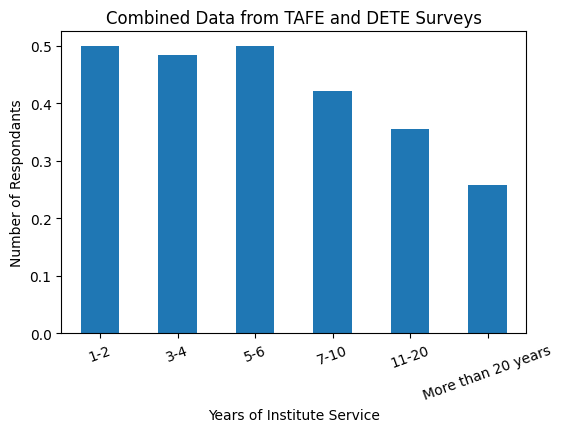

In [159]:
combined_pivot_sort.plot(y='dissatisfied',kind='bar',rot=20, legend=False)
plt.xlabel('Years of Institute Service')
plt.ylabel('Number of Respondants')
plt.title('Combined Data from TAFE and DETE Surveys')
plt.show()

Generally people who are dissatisfied resign after fewer years of service. Many stay for anywhere between 1 year and 6 years, but after that, the numbers drop. Since this analysis is specific to two years of data, this may correspond to a specific two years where certain people were drawn to the district by certain benefits or factors, while these evaporated after 5-6 years at the time of this data analysis. In contrast, it might also indicate that after about 5-6 years, people are more likely to be dissatisfied, or have experienced factors that change their perceptions of their job or their life decisions. Age, destinations following resignation, factors that lead to resignation, and experiences while on the job could help shed light on some of these possibilities. 

# Dissatisfaction by Age

In [160]:
combined_updated['age'].value_counts(dropna=False).sort_index()

20 or younger     3
21  25           13
21-25            21
26  30           12
26-30            29
31  35            8
31-35            25
36  40           13
36-40            31
41  45           16
41-45            41
46  50           15
46-50            35
51-55            39
56 or older      13
56-60            22
61 or older      22
NaN              21
Name: age, dtype: int64

In [161]:
combined_age=combined_updated.copy()

In [162]:
combined_age=combined_age.dropna(subset=['age']).copy()

In [163]:
combined_age['age'].value_counts(dropna=False)

41-45            41
51-55            39
46-50            35
36-40            31
26-30            29
31-35            25
56-60            22
61 or older      22
21-25            21
41  45           16
46  50           15
56 or older      13
36  40           13
21  25           13
26  30           12
31  35            8
20 or younger     3
Name: age, dtype: int64

In [164]:
age_ranges=combined_age['age'].str.extract(r"([2-6][0-9])[-]*[\s]*([2-6][0-9])").copy()

In [165]:
age_ranges.iloc[:,0].value_counts(dropna=False)

41     57
46     50
36     44
26     41
51     39
NaN    38
21     34
31     33
56     22
Name: 0, dtype: int64

In [166]:
age_ranges.iloc[:,1].value_counts(dropna=False)

45     57
50     50
40     44
30     41
55     39
NaN    38
25     34
35     33
60     22
Name: 1, dtype: int64

In [167]:
age_ranges['range']=age_ranges.iloc[:,0].astype(str)+'-'+age_ranges.iloc[:,1].astype(str).copy()

In [168]:
age_ranges['range'].value_counts()

41-45      57
46-50      50
36-40      44
26-30      41
51-55      39
nan-nan    38
21-25      34
31-35      33
56-60      22
Name: range, dtype: int64

In [169]:
is_age_limit=combined_age['age'].str.contains(r"or")

In [170]:
is_age_limit.value_counts(dropna=False)

False    320
True      38
Name: age, dtype: int64

In [171]:
combined_age[is_age_limit]['age']

16       61 or older
23       61 or older
34       61 or older
51       61 or older
145      61 or older
183      61 or older
212      61 or older
264    20 or younger
279      61 or older
293      61 or older
407      61 or older
416      61 or older
492      61 or older
503      61 or older
589      61 or older
604      61 or older
610      61 or older
650      61 or older
652      61 or older
658      61 or older
712      61 or older
735      61 or older
751      61 or older
391      56 or older
401      56 or older
424    20 or younger
448      56 or older
463      56 or older
524      56 or older
544    20 or younger
546      56 or older
551      56 or older
564      56 or older
589      56 or older
630      56 or older
641      56 or older
679      56 or older
691      56 or older
Name: age, dtype: object

In [172]:
combined_age['age_range']=age_ranges['range'].copy()

In [173]:
combined_age[is_age_limit].loc[:,'age_range']=combined_age[is_age_limit]['age'].copy()

/dataquest/system/env/python3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [174]:
combined_age['age_range'].value_counts()

41-45      57
46-50      50
36-40      44
26-30      41
51-55      39
nan-nan    38
21-25      34
31-35      33
56-60      22
Name: age_range, dtype: int64

In [175]:
import numpy as np
combined_age['age_range']=np.where(is_age_limit, combined_age['age'],combined_age['age_range'])

In [176]:
combined_age['age_range'].value_counts()

41-45            57
46-50            50
36-40            44
26-30            41
51-55            39
21-25            34
31-35            33
61 or older      22
56-60            22
56 or older      13
20 or younger     3
Name: age_range, dtype: int64

In [177]:
def map_56_to_60(age_range_val):
    if age_range_val=='56-60':
        return '56 or older'
    elif age_range_val=='61 or older':
        return '56 or older'
    else:
        return age_range_val

In [178]:
combined_age['age_range']=combined_age['age_range'].apply(map_56_to_60)

In [179]:
combined_age['age_range'].value_counts()

56 or older      57
41-45            57
46-50            50
36-40            44
26-30            41
51-55            39
21-25            34
31-35            33
20 or younger     3
Name: age_range, dtype: int64

In [180]:
age_category_mapper={'20 or younger':0,'21-25':1,'26-30':2,'31-35':3,'36-40':4,'41-45':5,'46-50':6,'51-55':7,'56 or older':8}

In [181]:
combined_age['sort_age_range']=combined_age['age_range'].map(age_category_mapper)

In [182]:
combined_age=combined_age.sort_values('sort_age_range',ascending=True)

In [183]:
age_tally=combined_age.loc[:,['dissatisfied','age_range','sort_age_range']].groupby('age_range').agg({'dissatisfied':'mean','age_range':'count','sort_age_range':'min'}).sort_values('sort_age_range',ascending=True)

In [184]:
age_tally.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 20 or younger to 56 or older
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   dissatisfied    9 non-null      float64
 1   age_range       9 non-null      int64  
 2   sort_age_range  9 non-null      int64  
dtypes: float64(1), int64(2)
memory usage: 288.0+ bytes


Text(0.5, 1.0, 'Age distribution in the TAFE and DETE survey by age')

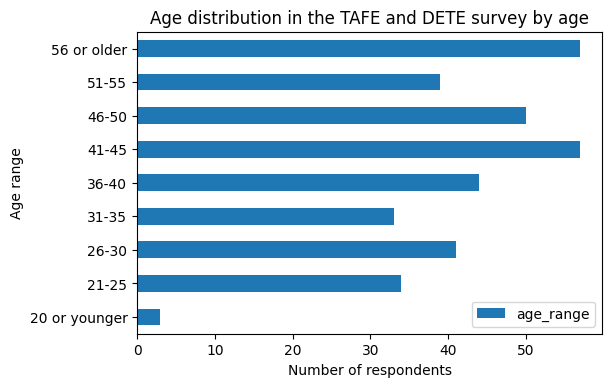

In [185]:
age_tally.plot(y='age_range',kind='barh')
plt.xlabel('Number of respondents')
plt.ylabel('Age range')
plt.title('Age distribution in the TAFE and DETE survey by age')

Text(0.5, 1.0, 'Portion dissatisfied in the TAFE and DETE survey by age')

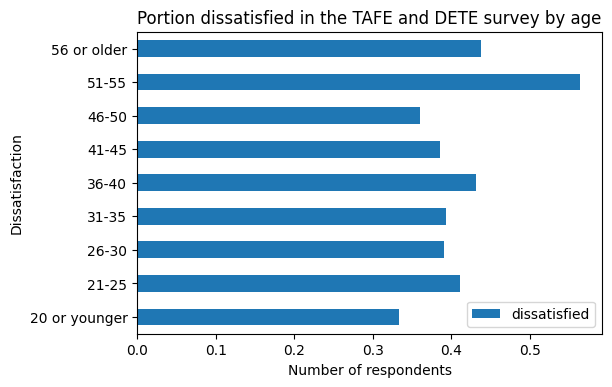

In [186]:
age_tally.plot(y='dissatisfied',kind='barh')
plt.xlabel('Number of respondents')
plt.ylabel('Dissatisfaction')
plt.title('Portion dissatisfied in the TAFE and DETE survey by age')

There were fewer younger people surveyed than older people, perhaps because fewer younger people resigned (or worked there?). The next question is to address percentage of dissatsifaction by age. Then attempt to correlate it with years served and factors.

# Length of service by age

In [187]:
age_service=combined_age.loc[:,['age_range','institute_service_category']].groupby('age_range')['institute_service_category'].apply(pd.Series.mode)

In [188]:
age_service

age_range       
20 or younger  0                   3-4
21-25          0                   1-2
26-30          0                  7-10
31-35          0                   3-4
36-40          0                  7-10
41-45          0                   1-2
               1                 11-20
46-50          0                 11-20
               1    More than 20 years
51-55          0                 11-20
56 or older    0    More than 20 years
Name: institute_service_category, dtype: object

In [189]:
age_service=age_service.reset_index()

In [190]:
age_service

,age_range,level_1,institute_service_category
0,20 or younger,0,3-4
1,21-25,0,1-2
2,26-30,0,7-10
3,31-35,0,3-4
4,36-40,0,7-10
5,41-45,0,1-2
6,41-45,1,11-20
7,46-50,0,11-20
8,46-50,1,More than 20 years
9,51-55,0,11-20


In [191]:
age_service_pivot=pd.pivot_table(combined_age,values='dissatisfied',index='institute_service_category',columns='age_range',aggfunc='mean',dropna=True,fill_value=0)

In [192]:
age_service_pivot

age_range,20 or younger,21-25,26-30,31-35,36-40,41-45,46-50,51-55,56 or older
institute_service_category,,,,,,,,,
1-2,0.0,0.470588,0.500000,0.333333,0.333333,0.461538,0.600000,1.000000,1.000000
11-20,0.0,0.000000,0.000000,0.333333,0.300000,0.307692,0.416667,0.444444,0.357143
3-4,0.5,0.333333,0.666667,0.300000,0.000000,0.777778,0.333333,0.600000,0.800000
5-6,0.0,1.000000,0.125000,0.500000,0.800000,0.500000,0.714286,0.400000,0.500000
7-10,0.0,0.000000,0.333333,0.571429,0.666667,0.125000,0.272727,0.714286,0.400000
More than 20 years,0.0,0.500000,0.250000,0.000000,0.333333,0.125000,0.083333,0.375000,0.346154


In [193]:
category_list=['1-2','3-4','5-6','7-10','11-20','More than 20 years']

In [194]:
age_service_pivot.index=pd.CategoricalIndex(age_service_pivot.index,categories=category_list)

In [195]:
age_service_pivot.sort_index(level=0,inplace=True)

In [196]:
age_service_pivot

age_range,20 or younger,21-25,26-30,31-35,36-40,41-45,46-50,51-55,56 or older
institute_service_category,,,,,,,,,
1-2,0.0,0.470588,0.500000,0.333333,0.333333,0.461538,0.600000,1.000000,1.000000
3-4,0.5,0.333333,0.666667,0.300000,0.000000,0.777778,0.333333,0.600000,0.800000
5-6,0.0,1.000000,0.125000,0.500000,0.800000,0.500000,0.714286,0.400000,0.500000
7-10,0.0,0.000000,0.333333,0.571429,0.666667,0.125000,0.272727,0.714286,0.400000
11-20,0.0,0.000000,0.000000,0.333333,0.300000,0.307692,0.416667,0.444444,0.357143
More than 20 years,0.0,0.500000,0.250000,0.000000,0.333333,0.125000,0.083333,0.375000,0.346154


Text(0.5, 1.0, 'Portion of people dissatsified by age and years served at resignation')

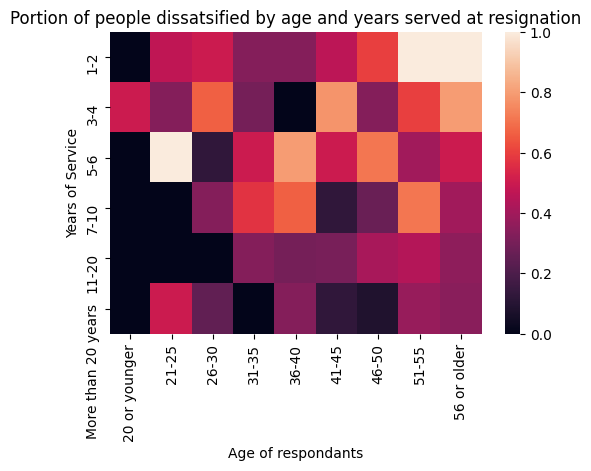

In [197]:
import seaborn as sns
sns.heatmap(age_service_pivot)
plt.xlabel('Age of respondants')
plt.ylabel('Years of Service')
plt.title('Portion of people dissatsified by age and years served at resignation')

**Want to sort the x and y axis here but also want to move on**

People were generally more dissatisfied the older they were and the shorter a time they had served. This is especially true of people over 51 who served 1-2 years. People 21-25 who served 5-6 years were also very dissatisfied. This would indicate that they had served since they graduated high school, more or less, at a first job, and kept it for some time, so this cateogry is unique in its own way.

There is definitely some data that is likely still spurious. It is not very likely a 25 or 30 year old served more than 20 years. Though child labor does happen, it is not usually common in school districts.

# Factors for resignation of people who were dissatisfied

In [198]:
dissatisfied_people=combined_age[combined_age['dissatisfied']]

In [199]:
dissatisfied_people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 424 to 401
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             150 non-null    float64
 1   separationtype                 150 non-null    object 
 2   cease_date                     150 non-null    float64
 3   dete_start_date                47 non-null     float64
 4   role_start_date                45 non-null     float64
 5   position                       148 non-null    object 
 6   employment_status              149 non-null    object 
 7   career_move_to_public_sector   150 non-null    object 
 8   career_move_to_private_sector  150 non-null    object 
 9   interpersonal_conflicts        150 non-null    object 
 10  job_dissatisfaction            150 non-null    object 
 11  dissatisfaction                150 non-null    object 
 12  physical_work_environment      51 non-null     o

In [200]:
dissatisfied_people=dissatisfied_people.dropna(thresh=100, axis=1)

In [201]:
dissatisfied_people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 424 to 401
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             150 non-null    float64
 1   separationtype                 150 non-null    object 
 2   cease_date                     150 non-null    float64
 3   position                       148 non-null    object 
 4   employment_status              149 non-null    object 
 5   career_move_to_public_sector   150 non-null    object 
 6   career_move_to_private_sector  150 non-null    object 
 7   interpersonal_conflicts        150 non-null    object 
 8   job_dissatisfaction            150 non-null    object 
 9   dissatisfaction                150 non-null    object 
 10  maternity/family               150 non-null    object 
 11  study/travel                   150 non-null    bool   
 12  ill_health                     150 non-null    o

In [202]:
dissatisfied_people['gender'].value_counts(dropna=False)

Female    95
Male      53
NaN        2
Name: gender, dtype: int64

In [203]:
def map_gender(gender):
    if gender=='Female':
        return True
    elif gender=='Male':
        return False
    else:
        return np.nan
    

In [204]:
dissatisfied_people['gender_TF']=dissatisfied_people['gender'].apply(map_gender)

In [205]:
dissatisfied_people['gender_TF'].value_counts(dropna=False)

True     95
False    53
NaN       2
Name: gender_TF, dtype: int64

In [206]:
dissatisfied_people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 424 to 401
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             150 non-null    float64
 1   separationtype                 150 non-null    object 
 2   cease_date                     150 non-null    float64
 3   position                       148 non-null    object 
 4   employment_status              149 non-null    object 
 5   career_move_to_public_sector   150 non-null    object 
 6   career_move_to_private_sector  150 non-null    object 
 7   interpersonal_conflicts        150 non-null    object 
 8   job_dissatisfaction            150 non-null    object 
 9   dissatisfaction                150 non-null    object 
 10  maternity/family               150 non-null    object 
 11  study/travel                   150 non-null    bool   
 12  ill_health                     150 non-null    o

In [207]:
dissatisfied_people['maternity/family'].value_counts(dropna=False)

True     93
False    57
Name: maternity/family, dtype: int64

In [240]:
frac_diss_col=['career_move_to_private_sector','career_move_to_public_sector','interpersonal_conflicts','maternity/family','study/travel','ill_health','gender_TF']

In [241]:
temp=[True,True,False]

In [242]:
np.mean(temp)

0.6666666666666666

In [243]:
mfv=dissatisfied_people['maternity/family'].values

In [244]:
mvfl=list(mfv)

In [245]:
np.mean(mvfl)

0.62

In [246]:
num_dissatisfied=dissatisfied_people[frac_diss_col].applymap(lambda x: 1 if x else 0)

In [247]:
frac_dissatisfied=num_dissatisfied.mean(axis=0)

In [248]:
frac_dissatisfied

career_move_to_private_sector    0.473333
career_move_to_public_sector     0.593333
interpersonal_conflicts          0.680000
maternity/family                 0.620000
study/travel                     0.660000
ill_health                       0.606667
gender_TF                        0.646667
dtype: float64

In [249]:
frac_dissatisfied.index=['Move to Private Sector','Move to Public Sector','Interpersonal Conflicts','Maternity or Family','Study or Travel','Poor Health','Fraction Female']

In [250]:
frac_dissatisfied

Move to Private Sector     0.473333
Move to Public Sector      0.593333
Interpersonal Conflicts    0.680000
Maternity or Family        0.620000
Study or Travel            0.660000
Poor Health                0.606667
Fraction Female            0.646667
dtype: float64

Text(0, 0.5, 'Proportion of Dissatsified Respondants')

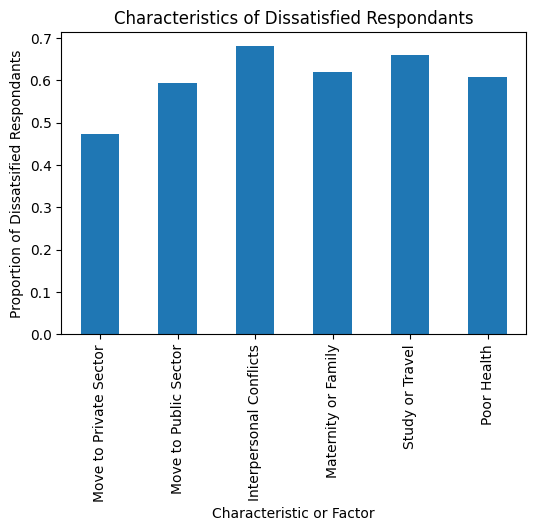

In [251]:
frac_dissatisfied[:-1].plot(kind='bar')
plt.title('Characteristics of Dissatisfied Respondants')
plt.xlabel('Characteristic or Factor')
plt.ylabel('Proportion of Dissatsified Respondants')

**Those who moved to the private sector were the least dissatisfied. Those with interpersonal conflicts were the most dissatisfied.**

In [253]:
frac_dissatisfied['Fraction Male']=1-frac_dissatisfied['Fraction Female']

In [254]:
frac_dissatisfied

Move to Private Sector     0.473333
Move to Public Sector      0.593333
Interpersonal Conflicts    0.680000
Maternity or Family        0.620000
Study or Travel            0.660000
Poor Health                0.606667
Fraction Female            0.646667
Fraction Male              0.353333
dtype: float64

Text(0, 0.5, 'Fractionn dissatisifed')

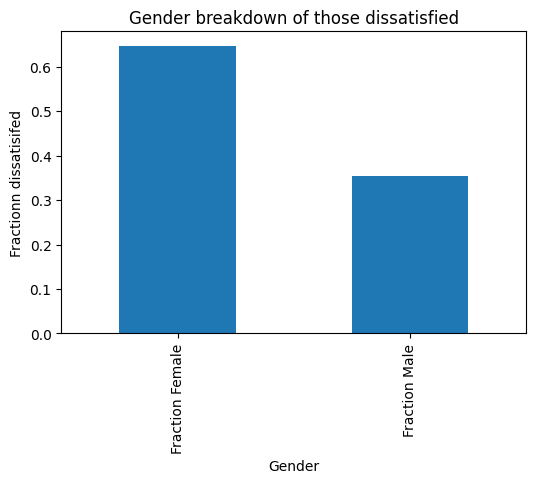

In [255]:
frac_dissatisfied[-2:].plot(kind='bar')
plt.title('Gender breakdown of those dissatisfied')
plt.xlabel('Gender')
plt.ylabel('Fractionn dissatisifed')

**More women than men were dissatisified. I have not yet compared to the number of women vs men total.**

# Total men vs woman comparison

In [257]:
combined_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 424 to 534
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             358 non-null    float64
 1   separationtype                 358 non-null    object 
 2   cease_date                     358 non-null    float64
 3   dete_start_date                228 non-null    float64
 4   role_start_date                219 non-null    float64
 5   position                       355 non-null    object 
 6   employment_status              356 non-null    object 
 7   career_move_to_public_sector   358 non-null    object 
 8   career_move_to_private_sector  358 non-null    object 
 9   interpersonal_conflicts        358 non-null    object 
 10  job_dissatisfaction            358 non-null    object 
 11  dissatisfaction                358 non-null    object 
 12  physical_work_environment      252 non-null    o

the dissatisfied people table was built on the combined age table by selecting only those dissatisfied. So we can determine the overall gender distribution by considering the distribution in the combined age table. We can determine the gender distribution of those who were satisfied by selecting those satisfied from that table. 

In [264]:
satisfied_people=combined_age[combined_age['dissatisfied'] == False].copy()

In [265]:
satisfied_people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 544 to 534
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             208 non-null    float64
 1   separationtype                 208 non-null    object 
 2   cease_date                     208 non-null    float64
 3   dete_start_date                181 non-null    float64
 4   role_start_date                174 non-null    float64
 5   position                       207 non-null    object 
 6   employment_status              207 non-null    object 
 7   career_move_to_public_sector   208 non-null    object 
 8   career_move_to_private_sector  208 non-null    object 
 9   interpersonal_conflicts        208 non-null    object 
 10  job_dissatisfaction            208 non-null    object 
 11  dissatisfaction                208 non-null    object 
 12  physical_work_environment      201 non-null    o

In [266]:
satisfied_people['gender_TF']=satisfied_people['gender'].apply(map_gender)

In [271]:
satisfied_gender=satisfied_people['gender_TF'].value_counts(dropna=False)

In [272]:
satisfied_gender

True     159
False     46
NaN        3
Name: gender_TF, dtype: int64

In [279]:
satisfied_women,satisfied_men = satisfied_gender.loc[True],satisfied_gender.loc[False]

In [280]:
satisfied_women

159

In [281]:
satisfied_men

46

In [282]:
dissatisfied_gender=dissatisfied_people['gender_TF'].value_counts(dropna=False)

In [283]:
dissatisfied_women,dissatisfied_men=dissatisfied_gender.loc[True],dissatisfied_gender.loc[False]

In [284]:
dissatisfied_men

53

In [285]:
dissatisfied_women

95

In [286]:
dissatisfied_gender

True     95
False    53
NaN       2
Name: gender_TF, dtype: int64

Text(0, 0.5, 'Number of former employees')

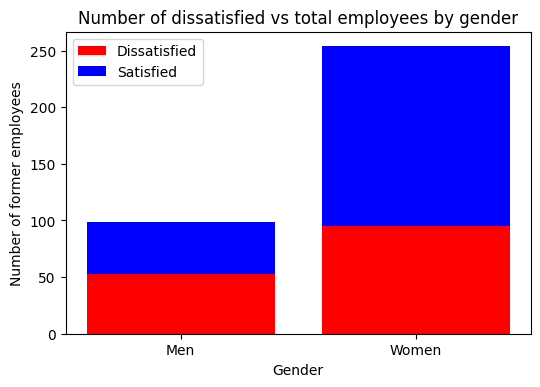

In [288]:
x = ['Men','Women']
y1 = [dissatisfied_men, dissatisfied_women]
y2 = [satisfied_men, satisfied_women]
plt.bar(x,y1,color='r')
plt.bar(x,y2,bottom=y1,color='b')
plt.legend(['Dissatisfied','Satisfied'])
plt.title('Number of dissatisfied vs total employees by gender')
plt.xlabel('Gender')
plt.ylabel('Number of former employees')

In [289]:
total_men=dissatisfied_men+satisfied_men
total_women=dissatisfied_women+satisfied_women
pct_men=dissatisfied_men/total_men
pct_women=dissatisfied_women/total_women

Text(0.5, 1.0, 'Percentage dissatisfied by gender')

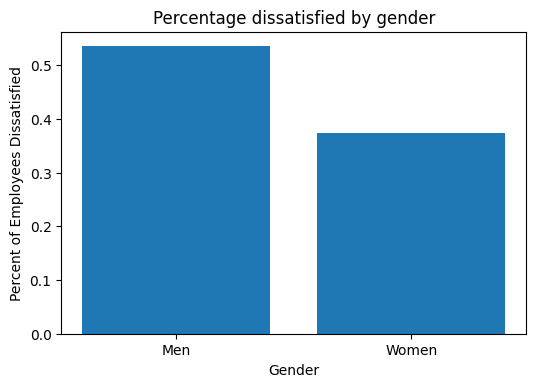

In [291]:
plt.bar(x=['Men','Women'],height=[pct_men,pct_women])
plt.xlabel('Gender')
plt.ylabel('Percent of Employees Dissatisfied')
plt.title('Percentage dissatisfied by gender')

**Although more women resigned, and in an absolute sense there were a larger number of dissatisfied women, a higher proportion of the number of men who resigned were dissatisfied.**

I really could keep going and analyze factor influences by gender and age, but I think I have to cut this project off in the interest of learning more. I'm going to skip formatting and documentation as well, in the interest of moving on to the next section! This project has been a ton of fun, and I really enjoy exploring the data!